## **Sleep Health and Lifestyle Dataset**

***Introdução***

Distúrbios do sono são condições que afetam a qualidade, quantidade ou horário do sono, causando problemas tanto durante o sono quanto durante o dia.

Neste trabalho abordamos a insónia, em que a pessoa tem dificuldade em adormecer ou em manter o sono, levando a um sono insuficiente ou de má qualidade. Por outro lado, na apneia do sono, a pessoa sofre de pausas na respiração durante o sono, resultando em padrões de sono interrompidos e potenciais riscos para a saúde.

Estes distúrbios impactam a saúde física, e mental, reduzindo assim, a qualidade de vida, sendo importante estudar estes distúrbios, de modo a conhecê-los bem, para os diagnosticar e tratar corretamente.



***Referências Bibliográfias***
*  https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?resource=download

***Objetivo***


O principal objetivo deste trabalho é explorar e analisar o conjunto de dados *“Sleep Health and Lifestyle Dataset"* de forma a compreender como diferentes fatores demográficos e de estilo de vida, influenciam a duração e qualidade do sono. Estes fatores são:
* género
* profissão
* idade
* nível de stress
* atividade física
* presença de distúrbios do sono

Através de técnicas de análise de dados com Python e visualização gráfica, pretende-se identificar padrões relevantes que possam contribuir para uma melhor compreensão dos comportamentos de sono e possíveis implicações para a saúde.

Este tipo de análise é importante não só do ponto de vista académico, mas também no contexto da saúde pública, uma vez que distúrbios do sono estão frequentemente associados a várias complicações físicas e psicológicas.


**Código base**

Importação das bibliotecas essenciais para análise e visualização de dados
* import pandas as pd
* import numpy as np
* import matplotlib.pyplot as plt
* import seaborn as sns
3.2 Leitura dos dados

Carregamento do dataset para leitura
* data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
print(data)

In [ ]:
# Importar a biblioteca pandas com o apelido "pd" para manipulação e análise de dados em formato de tabelas (DataFrames)
import pandas as pd

# Importar a biblioteca numpy com o apelido "np" para realizar operações matemáticas e trabalhar com arrays e matrizes numéricas
import numpy as np

# Importar a subbiblioteca pyplot da matplotlib com o apelido "plt", usada para criar gráficos (linhas, barras, dispersão, etc.)
import matplotlib.pyplot as plt

# Importar a biblioteca seaborn com o apelido "sns", utilizada para visualização estatística de dados com gráficos mais detalhados e esteticamente agradáveis
import seaborn as sns

# Para fazer o teste Tstudent - utilizado quando se quer comparar a média de uma variável numérica contínua entre dois grupos definidos por uma variável categórica.
from scipy.stats import ttest_ind

# Para fazer ANOVA - mesma comparação que o teste Tstudent, mas entre três ou mais grupos.
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Para se poder fazer uma Correlação de Pearson - medir a força e direção da relação entre duas variáveis numéricas contínuas
from scipy.stats import pearsonr


# Para fazermos o teste Qui-quadrado - verificar se existe associação entre duas variáveis categóricas, ou seja, se as categorias de uma estão relacionadas com as da outra
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ler o ficheiro e armazenar os dados num DataFrame chamado "data".
# Os dados foram extraidos no site https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?resource=download
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sleep_health_and_lifestyle_dataset.csv")
# Imprimir o conteúdo completo do DataFrame para visualização dos dados carregados
print(data)
print(data)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

#**Análise da Duração Média do Sono e Fatores Associados**

Estas análises visam avaliar a duração média de sono e/ou qualidade do sono em função de variáveis. Para todas, foi utilizado o mesmo código-base, ajustando apenas a variável de agrupamento.
* Por Género
* Por Profissão
* Por Distúrbio do Sono
* Por Idade
* Por Nível de Stress
* Por Nível de Atividade Física


Análise de Fatores de Estilo de Vida

* Passos Médios por Profissão - Analisar o número médio de passos diários em função da profissão

* Qualidade do Sono por Categoria de IMC - Analisar a qualidade média do sono por categoria de IMC


#**Base do código para analisar a média de uma variável numérica em função de uma variável categórica**

Agrupar os dados pela variável categórica e calcular a média da variável numérica
* media_por_grupo = data.groupby("VARIAVEL_CATEGORICA")["VARIAVEL_NUMERICA"].mean()

Imprimir a média por grupo
* print(f"Média de { 'VARIAVEL_NUMERICA' } por { 'VARIAVEL_CATEGORICA' }:")
print(media_por_grupo, "\n")
Criar gráfico de barras com seaborn
sns.barplot(data=data, x="VARIAVEL_CATEGORICA", y="VARIAVEL_NUMERICA")

Adicionar título e rótulos
* plt.title(f"Média de { 'VARIAVEL_NUMERICA' } por { 'VARIAVEL_CATEGORICA' }")
plt.ylabel("VALOR Y")
plt.xlabel("CATEGORIA X")

Definir limites do eixo y (opcional)
* plt.ylim(0, LIMITE_MAXIMO)  # Ex: plt.ylim(0, 10)

Rodar rótulos do eixo x se necessário
* plt.xticks(rotation=45, ha="right")

Ajustar o layout e mostrar o gráfico
* plt.tight_layout()
* plt.show()


Duração média de sono por género:
Gender
Female    7.229730
Male      7.036508
Name: Sleep Duration, dtype: float64 



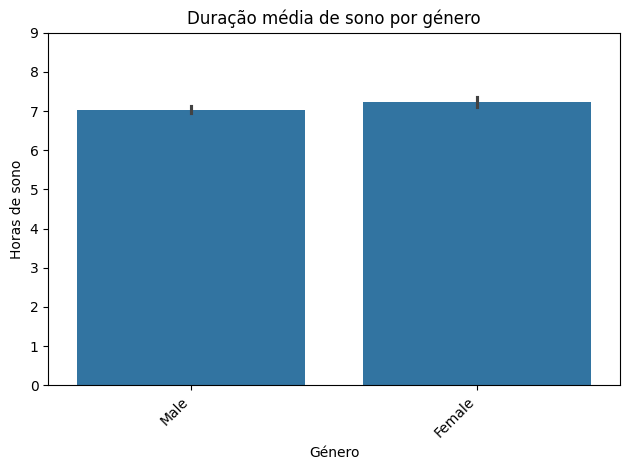

Resultado do teste t de Student:
t = -2.357, p = 0.0190
 Diferença estatisticamente significativa entre géneros.


In [ ]:
# Análisar a duração média de sono por género

# Calcular a média de horas de sono, agrupando os dados pela coluna "Gender"
media_sono_genero = data.groupby("Gender")["Sleep Duration"].mean()

# Imprimir no ecrã a média de sono por género
print("Duração média de sono por género:")
print(media_sono_genero, "\n")

# Criar um gráfico de barras com a biblioteca seaborn para visualizar a média de sono por género
sns.barplot(data=data, x="Gender", y="Sleep Duration")
# Adicionar o título ao gráfico
plt.title("Duração média de sono por género")
# Definir o rótulo do eixo y
plt.ylabel("Horas de sono")
# Definir o rótulo do eixo x
plt.xlabel("Género")
# Definir os limites do eixo y (de 0h a 9h) para manter consistência visual
plt.ylim(0, 9)
# Rodar os rótulos do eixo x ligeiramente para melhor legibilidade
plt.xticks(rotation=45, ha="right")
# Ajustar automaticamente o layout do gráfico para que não haja sobreposição
plt.tight_layout()
# Mostrar o gráfico no ecrã
plt.show()


# TESTE T DE STUDENT
male = data[data["Gender"] == "Male"]["Sleep Duration"].dropna()
female = data[data["Gender"] == "Female"]["Sleep Duration"].dropna()

t_stat, p_val = ttest_ind(male, female, equal_var=False)

# Mostrar resultados do teste
print(f"Resultado do teste t de Student:")
print(f"t = {t_stat:.3f}, p = {p_val:.4f}")

if p_val < 0.05:
    print(" Diferença estatisticamente significativa entre géneros.")
else:
    print(" Não há diferença estatisticamente significativa entre géneros.")

Em média, as mulheres apresentam ligeiramente mais horas de sono, em comparação com os homens.


Duração média de sono por profissão:
Occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.063014
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: Sleep Duration, dtype: float64 



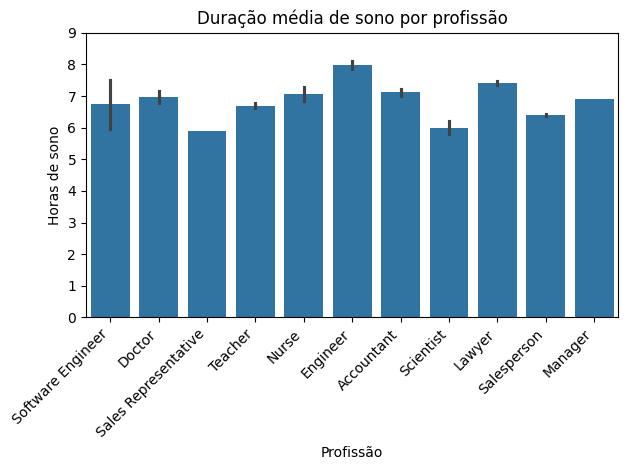

Resultado da ANOVA:
                   sum_sq     df          F        PR(>F)
C(Occupation)   85.563496   10.0  20.627777  2.911752e-30
Residual       150.571477  363.0        NaN           NaN

 Existe diferença estatisticamente significativa entre profissões (p = 0.0000)


/tmp/ipython-input-16-1477458473.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = anova["PR(>F)"][0]


In [ ]:
# Análisar a duração média de sono por profissão

# Análisar da duração média de sono por profissão
media_sono_profissao = data.groupby("Occupation")["Sleep Duration"].mean()

# Imprimir no ecrã os valores da duração média de sono para cada profissão
print("Duração média de sono por profissão:")
print(media_sono_profissao, "\n")

# Criar um gráfico de barras para visualizar a média de sono por profissão
sns.barplot(data=data, x="Occupation", y="Sleep Duration")
# Definir o título do gráfico
plt.title("Duração média de sono por profissão")
# Definir o rótulo do eixo y
plt.ylabel("Horas de sono")
# Definir o rótulo do eixo x
plt.xlabel("Profissão")
# Definir o intervalo do eixo y de 0 a 9 horas, para manter consistência com outros gráficos
plt.ylim(0, 9)
# Rodar os nomes das profissões no eixo x para evitar sobreposição e melhorar a legibilidade
plt.xticks(rotation=45, ha="right")
# Rodar os nomes das profissões no eixo x para evitar sobreposição e melhorar a legibilidade
plt.tight_layout()
# Exibir o gráfico final
plt.show()


# Teste ANOVA: Sleep Duration ~ Occupation
modelo = ols('Q("Sleep Duration") ~ C(Occupation)', data=data).fit()
anova = sm.stats.anova_lm(modelo, typ=2)

print("Resultado da ANOVA:")
print(anova)

# Interpretação
p_valor = anova["PR(>F)"][0]
if p_valor < 0.05:
    print(f"\n Existe diferença estatisticamente significativa entre profissões (p = {p_valor:.4f})")
else:
    print(f"\n Não há diferença estatisticamente significativa entre profissões (p = {p_valor:.4f})")

Com este gráfico, pode-se concluir, que algumas profissões, como scientist, sales person, e sales representative, apresentam uma média de horas de sono mais baixas em relação às restantes profissões. Engineering é  o que apresenta em média mais horas de sono.


Duração média de sono por distúrbio:
Duração média de sono por distúrbio:
Sleep Disorder
Insomnia       6.589610
Sleep Apnea    7.032051
Name: Sleep Duration, dtype: float64 



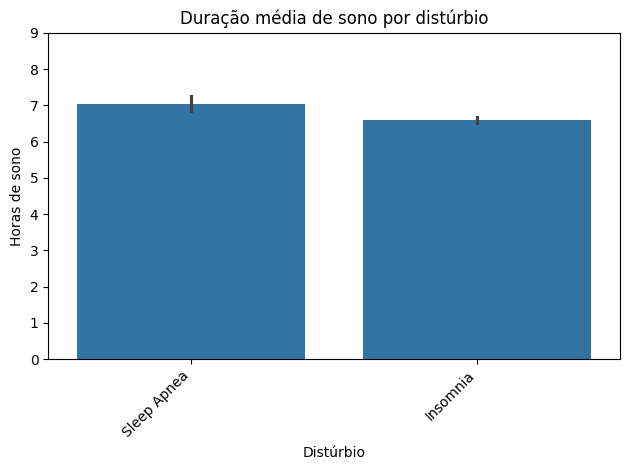

Resultado da ANOVA:
                          sum_sq     df         F    PR(>F)
C(Q("Sleep Disorder"))   7.58515    1.0  13.72406  0.000295
Residual                84.56156  153.0       NaN       NaN

Existe diferença estatisticamente significativa entre os grupos de distúrbio (p = 0.0003)


/tmp/ipython-input-17-1851656516.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = anova["PR(>F)"][0]


In [ ]:
# Análisar a duração média de sono por distúrbio do sono

# Agrupar os dados pela coluna "Sleep Disorder" e calcula a média da coluna "Sleep Duration" para cada grupo
media_sono_disturbio = data.groupby("Sleep Disorder")["Sleep Duration"].mean()
# Imprimir no ecrã os valores da duração média de sono para cada tipo de distúrbio (ou ausência dele)
print("Duração média de sono por distúrbio:")
print("Duração média de sono por distúrbio:")
print(media_sono_disturbio, "\n")

# Criar um gráfico de barras com seaborn para visualizar a média de sono em função dos distúrbios do sono
sns.barplot(data=data, x="Sleep Disorder", y="Sleep Duration")
# Definir o título do gráfico
plt.title("Duração média de sono por distúrbio")
# Definir o rótulo do eixo y (vertical)
plt.ylabel("Horas de sono")
# Definir o rótulo do eixo x (horizontal)
plt.xlabel("Distúrbio")
# Definir os limites do eixo y entre 0 e 9 horas, para manter consistência com os outros gráficos
plt.ylim(0, 9)
# Rodar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha="right")
# Ajustar automaticamente o layout para evitar sobreposição de elementos
plt.tight_layout()
# Mostrar o gráfico no ecrã
plt.show()


# Teste ANOVA: Sleep Duration ~ Sleep Disorder
modelo = ols('Q("Sleep Duration") ~ C(Q("Sleep Disorder"))', data=data).fit()
anova = sm.stats.anova_lm(modelo, typ=2)

print("Resultado da ANOVA:")
print(anova)

# Interpretação
p_valor = anova["PR(>F)"][0]
if p_valor < 0.05:
    print(f"\nExiste diferença estatisticamente significativa entre os grupos de distúrbio (p = {p_valor:.4f})")
else:
    print(f"\nNão há diferença estatisticamente significativa entre os grupos de distúrbio (p = {p_valor:.4f})")

Observa-se que em pessoas que sofrem de insônia a média de horas de sono é ligeiramente menor do que as que sofrem de apneia do sono.


Duração média de sono por idade:
Age
27    6.100000
28    6.020000
29    6.669231
30    7.569231
31    7.444444
32    6.588235
33    6.061538
34    5.800000
35    7.216667
36    7.066667
37    7.250000
38    7.185000
39    7.240000
40    7.550000
41    7.533333
42    7.433333
43    7.150000
44    6.440000
45    6.621429
48    6.833333
49    6.490909
50    6.155000
51    7.412500
52    7.177778
53    8.423529
54    8.414286
55    8.100000
56    8.200000
57    8.155556
58    8.000000
59    8.093750
Name: Sleep Duration, dtype: float64 



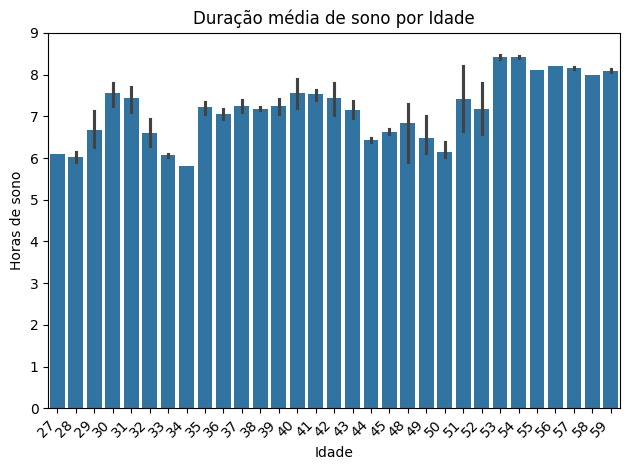

Coeficiente de correlação de Pearson: 0.345
Valor-p: 0.0000

Existe uma relação estatisticamente significativa entre idade e duração do sono.


In [ ]:
# Análisar a duração média de sono por idade

# Agrupar os dados pela coluna "Age" e calcula a média da coluna "Sleep Duration" para cada idade
media_sono_idade = data.groupby("Age")["Sleep Duration"].mean()

# Imprimir no ecrã os valores da duração média de sono para cada faixa etária
print("Duração média de sono por idade:")
print(media_sono_idade, "\n")

# Criar um gráfico de barras com seaborn para visualizar a média de sono em função da idade
sns.barplot(data=data, x="Age", y="Sleep Duration")
# Definir o título do gráfico
plt.title("Duração média de sono por Idade")
# Definir o rótulo do eixo y (vertical)
plt.ylabel("Horas de sono")
# Definir o rótulo do eixo x (horizontal)
plt.xlabel("Idade")
# Definir os limites do eixo y entre 0 e 9 horas, para manter coerência com os restantes gráficos
plt.ylim(0, 9)
# Rodar os rótulos do eixo x para evitar sobreposição e melhorar a legibilidade
plt.xticks(rotation=45, ha="right")
# Ajustar automaticamente o layout do gráfico para garantir que todos os elementos fiquem visíveis
plt.tight_layout()
# Exibir o gráfico final
plt.show()

# Eliminar valores em falta (caso existam)
df_corr = data[["Age", "Sleep Duration"]].dropna()

# Teste de correlação de Pearson
coef, p_valor = pearsonr(df_corr["Age"], df_corr["Sleep Duration"])

print(f"Coeficiente de correlação de Pearson: {coef:.3f}")
print(f"Valor-p: {p_valor:.4f}")

if p_valor < 0.05:
    print("\nExiste uma relação estatisticamente significativa entre idade e duração do sono.")
else:
    print("\nNão existe relação estatisticamente significativa entre idade e duração do sono.")

Pessoas com idades entre 54-59 anos apresentam em média mais horas de sono, comparativamente às restantes. As faixas etárias com menos horas de sono são entre 45-51 anos, 27-28 anos e 32-35 anos.


Duração média de sono por nível de stress:
Stress Level
3    8.971831
4    7.671429
5    7.895522
6    7.000000
7    6.000000
8    5.857143
Name: Quality of Sleep, dtype: float64 



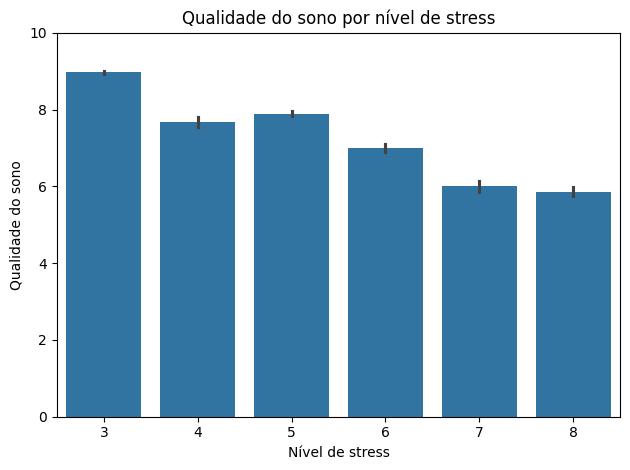

Coeficiente de correlação de Pearson: -0.899
Valor-p: 0.0000

Existe uma relação estatisticamente significativa entre nível de stress e qualidade do sono.


In [ ]:
# Analisar a qualidade do sono em função do nível de stress

# Agrupar os dados pela coluna "Stress Level" e calcular a média da coluna "Quality of Sleep" para cada nível de stress
media_sono_stress = data.groupby("Stress Level")["Quality of Sleep"].mean()

# Imprimir no ecrã os valores médios da qualidade do sono para cada nível de stress
print("Duração média de sono por nível de stress:")
print(media_sono_stress, "\n")

# Criar um gráfico de barras com seaborn para visualizar a qualidade média do sono por nível de stress
sns.barplot(data=data, x="Stress Level", y="Quality of Sleep")
# Definir o título do gráfico
plt.title("Qualidade do sono por nível de stress")
# Definir o rótulo do eixo y (vertical)
plt.ylabel("Qualidade do sono")
# Definir o rótulo do eixo x (horizontal)
plt.xlabel("Nível de stress")
# Definir os limites do eixo y entre 0 e 10 (escala da qualidade do sono)
plt.ylim(0, 10)
# Ajustar automaticamente o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()
# Exibir o gráfico final
plt.show()

# Eliminar valores em falta
df_corr = data[["Stress Level", "Quality of Sleep"]].dropna()

# Correlação de Pearson
coef, p_valor = pearsonr(df_corr["Stress Level"], df_corr["Quality of Sleep"])

print(f"Coeficiente de correlação de Pearson: {coef:.3f}")
print(f"Valor-p: {p_valor:.4f}")

if p_valor < 0.05:
    print("\nExiste uma relação estatisticamente significativa entre nível de stress e qualidade do sono.")
else:
    print("\nNão existe relação estatisticamente significativa entre nível de stress e qualidade do sono.")


Indivíduos com stress baixo ou moderado apresentam mais horas de sono.

/tmp/ipython-input-21-443394266.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_sono_atividade = data.groupby("Atividade")["Sleep Duration"].mean()


Duração média de sono por nível de atividade física:
Atividade
(29.94, 42.0]    7.043902
(42.0, 54.0]     6.542466
(54.0, 66.0]     7.187179
(66.0, 78.0]     7.901429
(78.0, 90.0]     7.021127
Name: Sleep Duration, dtype: float64 



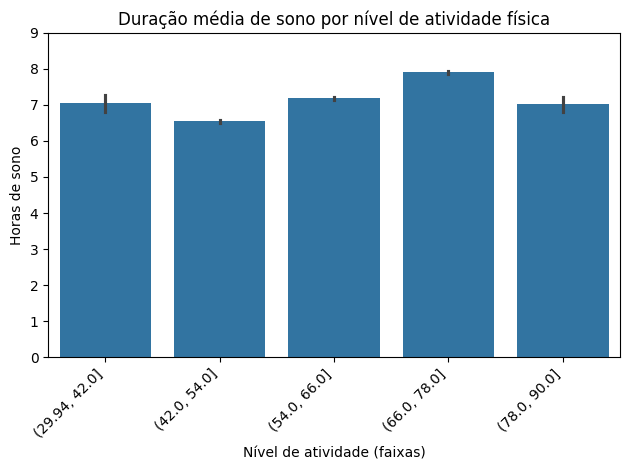

Resultado da ANOVA:
                  sum_sq     df          F        PR(>F)
C(Atividade)   68.559319    4.0  37.741743  1.802074e-26
Residual      167.575654  369.0        NaN           NaN

Existe diferença estatisticamente significativa entre faixas de atividade física (p = 0.0000)


/tmp/ipython-input-21-443394266.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = anova["PR(>F)"][0]


In [ ]:
# Analisar a duração média de sono em função do nível de atividade física (agrupado em faixas)

# Criar uma nova coluna chamada "Atividade", dividindo os níveis de atividade física em 5 faixas (bins) com pd.cut
data["Atividade"] = pd.cut(data["Physical Activity Level"], bins=5)

# Agrupar os dados pela nova coluna "Atividade" e calcular a média da coluna "Sleep Duration" para cada faixa
media_sono_atividade = data.groupby("Atividade")["Sleep Duration"].mean()

# Imprimir no ecrã os valores médios da qualidade do sono para cada nível de stress
print("Duração média de sono por nível de atividade física:")
print(media_sono_atividade, "\n")

# Criar um gráfico de barras com seaborn para visualizar a qualidade média do sono por nível de stress
sns.barplot(data=data, x="Atividade", y="Sleep Duration")
# Definir o título do gráfico
plt.title("Duração média de sono por nível de atividade física")
# Definir o rótulo do eixo y
plt.ylabel("Horas de sono")
# Definir o rótulo do eixo x
plt.xlabel("Nível de atividade (faixas)")
# Definir os limites do eixo y entre 0 e 10 (escala da qualidade do sono)
plt.ylim(0, 9)
# Rodar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha="right")
# Ajustar automaticamente o layout para evitar sobreposição de elementos
plt.tight_layout()
# Exibir o gráfico final
plt.show()


# ANOVA: Sleep Duration ~ Atividade (as categorias criadas com pd.cut)
modelo = ols('Q("Sleep Duration") ~ C(Atividade)', data=data).fit()
anova = sm.stats.anova_lm(modelo, typ=2)

print("Resultado da ANOVA:")
print(anova)

p_valor = anova["PR(>F)"][0]
if p_valor < 0.05:
    print(f"\nExiste diferença estatisticamente significativa entre faixas de atividade física (p = {p_valor:.4f})")
else:
    print(f"\nNão há diferença estatisticamente significativa entre faixas de atividade física (p = {p_valor:.4f})")

Pessoas com nível de atividade da faixa 66.0 e 78.0 têm a maior média de horas de sono. O grupo com menor média de sono está na faixa 42.0 a 54.0. As diferenças entre grupos existem, mas parecem moderadas.



Passos diários médios por profissão:
Occupation
Accountant              6881.081081
Doctor                  6808.450704
Engineer                5980.952381
Lawyer                  7661.702128
Manager                 5500.000000
Nurse                   8057.534247
Sales Representative    3000.000000
Salesperson             6000.000000
Scientist               5350.000000
Software Engineer       5800.000000
Teacher                 5957.500000
Name: Daily Steps, dtype: float64 



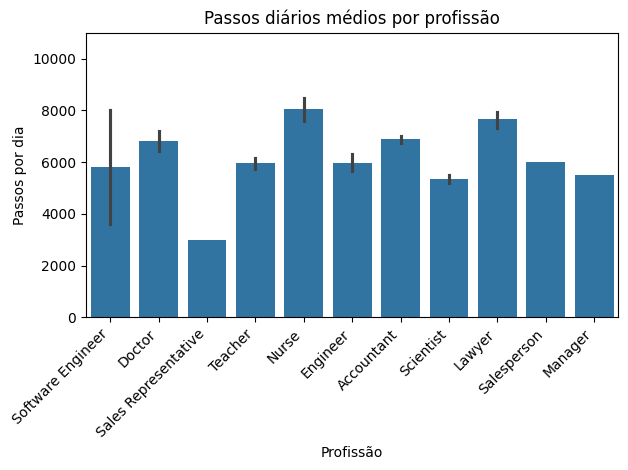

Resultado da ANOVA:
                     sum_sq     df          F        PR(>F)
C(Occupation)  2.845979e+08   10.0  14.933669  2.509847e-22
Residual       6.917860e+08  363.0        NaN           NaN

Existe diferença estatisticamente significativa entre profissões (p = 0.0000)


/tmp/ipython-input-22-1373719535.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = anova["PR(>F)"][0]


In [ ]:
# Analisar o número médio de passos diários em função da profissão

# Agrupar os dados pela coluna "Occupation" e calcular a média da coluna "Daily Steps" para cada profissão
media_passos_profissao = data.groupby("Occupation")["Daily Steps"].mean()

# Imprimir no ecrã os valores médios de passos diários por profissão
print("Passos diários médios por profissão:")
print(media_passos_profissao, "\n")

# Criar um gráfico de barras com seaborn para visualizar o número médio de passos por profissão
sns.barplot(data=data, x="Occupation", y="Daily Steps")
# Definir o título do gráfico
plt.title("Passos diários médios por profissão")
# Definir o rótulo do eixo y
plt.ylabel("Passos por dia")
# Definir o rótulo do eixo x
plt.xlabel("Profissão")
# Definir os limites do eixo y entre 0 e 11 000 passos para facilitar a comparação visual
plt.ylim(0, 11000)
# Rodar os rótulos do eixo x para evitar sobreposição e melhorar a legibilidade
plt.xticks(rotation=45, ha="right")
# Ajustar automaticamente o layout para garantir que todos os elementos fiquem visíveis
plt.tight_layout()
# Exibir o gráfico final
plt.show()


# Teste ANOVA: Daily Steps ~ Occupation
modelo = ols('Q("Daily Steps") ~ C(Occupation)', data=data).fit()
anova = sm.stats.anova_lm(modelo, typ=2)

print("Resultado da ANOVA:")
print(anova)

p_valor = anova["PR(>F)"][0]
if p_valor < 0.05:
    print(f"\nExiste diferença estatisticamente significativa entre profissões (p = {p_valor:.4f})")
else:
    print(f"\nNão há diferença estatisticamente significativa entre profissões (p = {p_valor:.4f})")

Profissões com maior exigência física (como “nurse”) apresentam maior número de passos, o que é esperado.
Ocupações sedentárias, como “software engineer” ou “sales representative”, tendem a ter uma mediana de passos bastante inferior.


Qualidade média do sono por categoria de IMC:
BMI Category
Normal           7.661538
Normal Weight    7.428571
Obese            6.400000
Overweight       6.898649
Name: Quality of Sleep, dtype: float64 



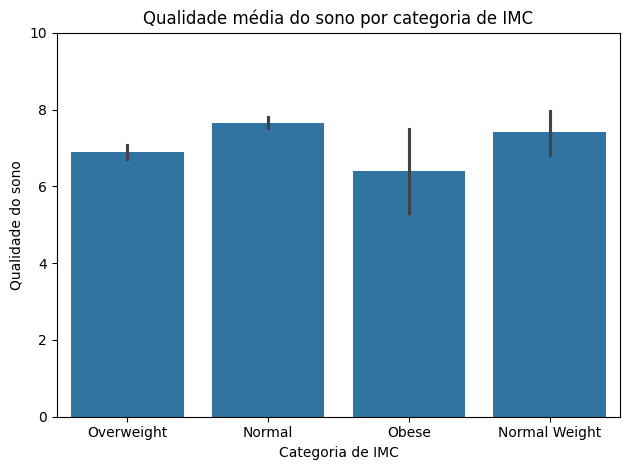

Resultado da ANOVA:
                          sum_sq     df          F        PR(>F)
C(Q("BMI Category"))   57.714270    3.0  14.932516  3.393089e-09
Residual              476.684125  370.0        NaN           NaN

Existe diferença estatisticamente significativa entre categorias de IMC (p = 0.0000)


/tmp/ipython-input-23-910387903.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = anova["PR(>F)"][0]


In [ ]:
# Analisar a qualidade média do sono em função da categoria de IMC (Índice de Massa Corporal)

# Agrupar os dados pela coluna "BMI Category" e calcular a média da coluna "Quality of Sleep" para cada categoria
media_sono_imc = data.groupby("BMI Category")["Quality of Sleep"].mean()

# Imprimir no ecrã os valores médios da qualidade do sono por categoria de IMC
print("Qualidade média do sono por categoria de IMC:")
print(media_sono_imc, "\n")

# Criar um gráfico de barras com seaborn para visualizar a qualidade média do sono por categoria de IMC
sns.barplot(data=data, x="BMI Category", y="Quality of Sleep")
# Definir o título do gráfico
plt.title("Qualidade média do sono por categoria de IMC")
# Definir o rótulo do eixo y
plt.ylabel("Qualidade do sono")
# Definir o rótulo do eixo x
plt.xlabel("Categoria de IMC")
# Definir os limites do eixo y entre 0 e 10 (escala da qualidade do sono)
plt.ylim(0, 10)
# Ajustar automaticamente o layout para evitar sobreposição de elementos
plt.tight_layout()
# Exibir o gráfico final
plt.show()



# ANOVA: Quality of Sleep ~ BMI Category
modelo = ols('Q("Quality of Sleep") ~ C(Q("BMI Category"))', data=data).fit()
anova = sm.stats.anova_lm(modelo, typ=2)

print("Resultado da ANOVA:")
print(anova)

p_valor = anova["PR(>F)"][0]
if p_valor < 0.05:
    print(f"\nExiste diferença estatisticamente significativa entre categorias de IMC (p = {p_valor:.4f})")
else:
    print(f"\nNão há diferença estatisticamente significativa entre categorias de IMC (p = {p_valor:.4f})")

Pessoas com IMC “obese” e “overweight” tendem a apresentar pior qualidade de sono. No entanto há dispersão nesta categoria, o que sugere, que nem todos os indivíduos com obesidade têm má qualidade de sono.


#**Criação da Função de Classificação de Risco de Distúrbio do Sono**
Para além da análise descritiva, foi criada uma função chamada risco_disturbio_completo, que avalia o risco de distúrbio do sono com base nos seguintes fatores:
* Diagnóstico clínico já registado (Sleep Disorder)
* Qualidade do sono
* Nível de stress
* Duração do sono
* Atividade física
* Categoria de IMC


# **Código da função**
Definir uma função de classificação de risco com base em múltiplas variáveis
def classificar_risco(variavel_clinica, v1, v2, v3, v4, categoria):

Se já existir um diagnóstico clínico explícito
* if variavel_clinica is not None and str(variavel_clinica).lower() not in ["none", "nan"]:
    * Return "Diagnóstico"

Condições para risco alto (ajustar os limiares conforme o contexto)
* elif (v1 < LIMIAR1 and v2 > LIMIAR2 and v3 < LIMIAR3) or v4 < LIMIAR4 or categoria == "CategoriaCrítica":
    * return "Alto"

Condições para risco médio (valores moderadamente alterados)
* elif v1 < LIMIAR1 or v2 > LIMIAR2 or v3 < LIMIAR3 or v4 < LIMIAR4 or categoria == "CategoriaModerada":
    * return "Médio"

Caso contrário, risco baixo
* else:
    * return "Baixo"


# **Aplicação da função e visualização da distribuição**
**Aplicar a função linha a linha e guardar o resultado numa nova coluna**
* data["Classificação de Risco"] = data.apply(
    lambda x: classificar_risco(
        x["VAR_CLINICA"],    
        x["VAR1"],           
        x["VAR2"],          
        x["VAR3"],         
        x["VAR4"],         
        x["CATEGORIA"]       
    ), axis=1
)

**Ver a distribuição das classificações**

* print(data["Classificação de Risco"].value_counts())

Gráfico de barras da distribuição
* plt.figure(figsize=(8, 6))
+ sns.countplot(data=data, x="Classificação de Risco", order=["Diagnóstico", "Alto", "Médio", "Baixo"])
+ plt.title("Distribuição da Classificação de Risco")
* plt.xlabel("Nível de Risco")
* plt.ylabel("Número de Casos")
* plt.tight_layout()
* plt.show()


In [ ]:
# Verificar o tipo de dado (ex: str, float, etc.) do primeiro valor da coluna "Sleep Disorder"
print(type(data["Sleep Disorder"].iloc[0]))

<class 'float'>


Distribuição geral da coluna 'Risco Distúrbio':
Risco Distúrbio
Diagnóstico    155
Baixo          137
Alto            60
Médio           22
Name: count, dtype: int64 



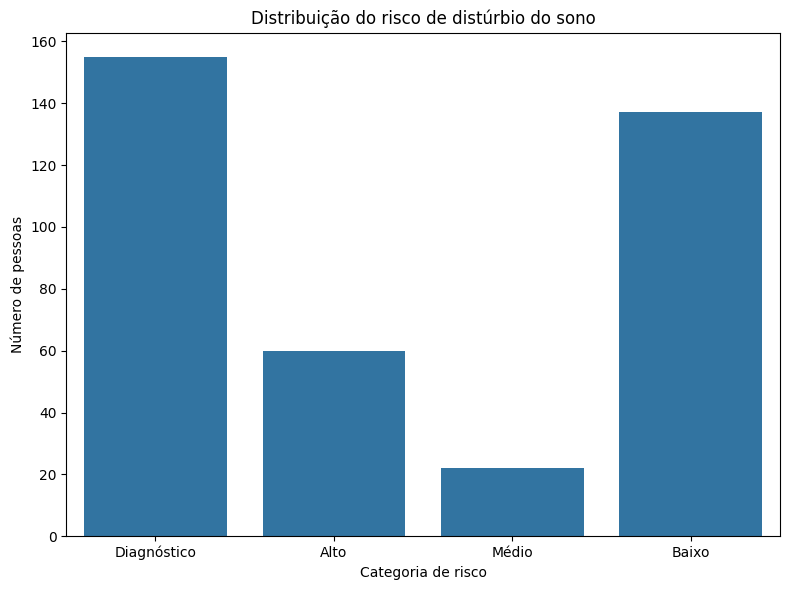

Teste do Qui-Quadrado: Associação entre 'Risco Distúrbio' e 'Sleep Disorder'
Valor do qui-quadrado: 0.00
Valor-p: 1.0000
Não existe associação estatisticamente significativa entre as variáveis.


In [ ]:
# Analisar o risco de distúrbio do sono com base em múltiplos fatores (diagnóstico, qualidade do sono, stress, etc.)

# Definir uma função que classifica o risco de distúrbio do sono com base em várias condições
def risco_disturbio_completo(disturbio, qualidade, stress, sono, atividade, imc):
   # Se houver diagnóstico explícito de distúrbio, o risco é considerado "Diagnóstico"
    if disturbio is not None and str(disturbio).lower() not in ["none", "nan"]:
        return "Diagnóstico"
   # Se a qualidade do sono for baixa, stress elevado, sono insuficiente, atividade física muito baixa ou IMC for "Obese" → risco alto
    elif (qualidade < 6 and stress > 6 and sono < 6) or atividade < 40 or imc == "Obese":
        return "Alto"
   # Se houver algum fator negativo isolado ou IMC "Overweight" → risco médio
    elif qualidade < 6 or stress > 6 or sono < 6 or atividade < 40 or imc == "Overweight":
        return "Médio"
    # Caso contrário, o risco é considerado baixo
    else:
        return "Baixo"


# Aplicar a função ao DataFrame linha a linha e criar nova coluna "Risco Distúrbio"
data["Risco Distúrbio"] = data.apply(
    lambda x: risco_disturbio_completo(
        x["Sleep Disorder"],
        x["Quality of Sleep"],
        x["Stress Level"],
        x["Sleep Duration"],
        x["Physical Activity Level"],
        x["BMI Category"]
    ), axis=1
)

# Imprimir a distribuição de frequência das categorias de risco na nova coluna
print("Distribuição geral da coluna 'Risco Distúrbio':")
print(data["Risco Distúrbio"].value_counts(), "\n")

# Criar gráfico de barras para visualizar a distribuição das categorias de risco
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Risco Distúrbio", order=["Diagnóstico", "Alto", "Médio", "Baixo"])

# Definir o título e rótulos do gráfico
plt.title("Distribuição do risco de distúrbio do sono")
plt.xlabel("Categoria de risco")
plt.ylabel("Número de pessoas")
# Ajustar automaticamente o layout
plt.tight_layout()
# Exibir o gráfico
plt.show()



# Criar tabela de contingência
tabela = pd.crosstab(data["Risco Distúrbio"], data["Sleep Disorder"])

# Aplicar o teste do qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

# Mostrar resultados
print("Teste do Qui-Quadrado: Associação entre 'Risco Distúrbio' e 'Sleep Disorder'")
print(f"Valor do qui-quadrado: {chi2:.2f}")
print(f"Valor-p: {p:.4f}")

# Interpretação
if p < 0.05:
    print("Existe associação estatisticamente significativa entre as variáveis.")
else:
    print("Não existe associação estatisticamente significativa entre as variáveis.")


A equação avalia primeiro se há diagnóstico clínico, atribuindo imediatamente risco máximo. Se não houver, combina múltiplos fatores como qualidade do sono baixa, stress elevado, sono insuficiente, atividade física muito baixa ou IMC "Obese" para classificar como risco alto. Fatores isolados, ou IMC "Overweight" indicam risco médio e a ausência de fatores de risco define risco baixo.

O gráfico mostra que a maioria das pessoas está em baixo risco ou já tem diagnóstico de distúrbio do sono, com poucos casos em risco médio ou alto. O facto de haver muitos já diagnosticados indica necessidade de intervenção precoce e rastreio. O pequeno número de pessoas em risco médio, sugere que, as pessoas ou têm poucos problemas ou acumulam múltiplos fatores que as colocam em risco alto. A presença de muitos em risco baixo é positiva.



# ***Conclusão***
A análise do conjunto de dados revelou uma correlação clara entre os fatores como stress, má qualidade do sono, sedentarismo e obesidade com um maior risco de distúrbios do sono. A classificação de risco criada permitiu identificar indivíduos em risco mesmo sem diagnóstico formal, destacando a importância de uma abordagem preventiva.

Com a utilização do Python foi possível explorar estes dados de forma eficiente e criar uma função que classifica o risco com base em múltiplos critérios. A função destacou casos sem diagnóstico formal mas com sinais de risco, sublinhando a importância de estratégias de triagem precoce. Este tipo de abordagem pode ser aplicado a outros contextos para promover a prevenção e uma visão mais completa da saúde.
